##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 8


Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions are worth 2 points each for a total of **20 points**.  

## Clustering crime

You have been hired as a consultant to help the FBI understand how to best support local law enforcement to keep crime rates down.  The FBI has the ability to start one crime prevention program and wants to identify which states are similar enough to benefit from the same program.  They have asked you to help with that identification process.  There is no requirement that the states be located near each other but they need to have similar "profiles". 

The CrimeData.csv file contains data on state level crime in 2014 from the Unified Crime Report from the FBI.  It also contains some other state level information such as population, unemployment rates, and average hourly wages. Definitions for the crime variables can be found here: https://www.ucrdatatool.gov/offenses.cfm

#### 1.  Perform some preliminary EDA on the data and describe the sample.  List 3 things you learn about crime from this exercise. How can you use that information? 

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
crimes = pd.read_csv('CrimeData.csv')
crimes.head()

,State,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
0,Alabama,4849377,5.70,29.60,41.30,96.90,283.40,819.00,2149.50,209.10,6.10,19.66
1,Alaska,736732,5.60,75.30,104.70,85.40,440.20,427.60,2096.40,236.00,6.50,25.98
2,Arizona,6731484,4.70,36.60,50.20,92.80,252.10,647.10,2289.10,261.30,6.10,21.43
3,Arkansas,2966369,5.60,39.80,59.40,69.10,346.00,835.70,2313.50,188.80,5.00,18.24
4,California,38802500,4.40,21.60,29.70,125.50,236.60,522.30,1527.40,391.30,6.20,25.91


In [2]:
crimes.dtypes

State                                         object
Population                                     int64
Murder and nonnegligent manslaughter rate    float64
Legacy rape rate /1                          float64
Revised rape rate /2                         float64
Robbery rate                                 float64
Aggravated assault rate                      float64
Burglary rate                                float64
Larceny-theft rate                           float64
Motor vehicle theft rate                     float64
Unemployment rate                            float64
Average Hourly Wage                          float64
dtype: object

Seeing that all of the variables are numeric data types (integers and floats), we know that they are ideal for K-clustering models that measures distances between data points.

In [3]:
crimes.count()

State                                        51
Population                                   51
Murder and nonnegligent manslaughter rate    51
Legacy rape rate /1                          51
Revised rape rate /2                         51
Robbery rate                                 51
Aggravated assault rate                      51
Burglary rate                                51
Larceny-theft rate                           51
Motor vehicle theft rate                     51
Unemployment rate                            51
Average Hourly Wage                          51
dtype: int64

In [4]:
crimes.isnull().sum()

State                                        0
Population                                   0
Murder and nonnegligent manslaughter rate    0
Legacy rape rate /1                          0
Revised rape rate /2                         0
Robbery rate                                 0
Aggravated assault rate                      0
Burglary rate                                0
Larceny-theft rate                           0
Motor vehicle theft rate                     0
Unemployment rate                            0
Average Hourly Wage                          0
dtype: int64

There are 51 rows with no value missing, thus not requiring us to clean the data.

In [5]:
crimes.describe()

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,6252099.14,4.30,29.38,40.51,88.96,230.64,527.28,1876.24,199.98,5.04,21.99
std,7124005.19,2.52,11.35,15.27,75.23,110.31,181.70,485.93,98.28,1.08,3.39
min,584153.00,0.90,10.70,14.30,9.10,66.90,257.20,1160.80,38.90,2.80,17.67
25%,1742395.00,2.45,21.60,30.05,50.80,150.75,374.15,1533.45,134.50,4.25,19.76
50%,4413457.00,4.00,27.10,37.30,82.70,218.40,468.70,1864.10,199.60,5.10,21.20
75%,6903469.00,5.60,34.75,46.80,110.45,277.35,696.10,2180.30,244.25,6.00,23.63
max,38802500.00,15.90,75.30,104.70,530.70,626.10,887.30,4082.30,574.10,6.90,37.78


The summary statistics above lets us know which states have a higher or lower rate of a given crime compared to other states. It could help us initially divide the states into lower rate group and higher rate group with the mean or median as the center point. Because the scale of the variables are quite different (ex. Murder and nonnegligent manslaughter rate ranges from 0.90 to 15.90 while Larceny-theft rate ranges from 1160.80 to 4082.30), we will have to normalize the data set at some point.

#### 2.  Name 3 questions you might want to try to answer with these data. How would you answer them?

1. Is there a positive correlation between rates of different types of crime?
2. Is there a positive correlation between population and crime rates?
3. Is there a positive correlation between higher unemployment rate and crime rates?

#### 3.  Answer one of your questions.  Does the answer surprise you?  Why or why not?

In [6]:
crimes.corr()

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
Population,1.00,0.06,-0.24,-0.23,0.16,0.02,0.07,-0.07,0.15,0.22,0.17
Murder and nonnegligent manslaughter rate,0.06,1.00,0.24,0.27,0.80,0.74,0.49,0.69,0.53,0.62,0.30
Legacy rape rate /1,-0.24,0.24,1.00,0.98,0.20,0.56,0.14,0.43,0.41,0.02,0.09
Revised rape rate /2,-0.23,0.27,0.98,1.00,0.21,0.59,0.17,0.44,0.42,0.08,0.09
Robbery rate,0.16,0.80,0.20,0.21,1.00,0.65,0.25,0.65,0.65,0.52,0.67
Aggravated assault rate,0.02,0.74,0.56,0.59,0.65,1.00,0.48,0.64,0.58,0.50,0.24
Burglary rate,0.07,0.49,0.14,0.17,0.25,0.48,1.00,0.55,0.46,0.50,-0.31
Larceny-theft rate,-0.07,0.69,0.43,0.44,0.65,0.64,0.55,1.00,0.72,0.33,0.29
Motor vehicle theft rate,0.15,0.53,0.41,0.42,0.65,0.58,0.46,0.72,1.00,0.37,0.39
Unemployment rate,0.22,0.62,0.02,0.08,0.52,0.50,0.50,0.33,0.37,1.00,0.24


Higher unemployment rate turns out to have a positive correlation with the rates of all different types of crime, which is not surprising as people tend to turn to illegal activities during financial hardships to support themselves.

#### 4.  You are asked to find similarities in the data (i.e. clusters).  What do you need to consider when choosing a clustering method?

We must consider the varaible data types and what data transformations are required for the chosen clustering method, depending on the variable types.

#### 5. What preparation do you need to do to the data, if any?  Why or why not? (Hint: you should use the state name as the index for the dataframe)

As mentioend in question 1, the scale of the variables are quite different so we will have to normalize the data set. We will use Z-score normalization.

In [7]:
crimes = crimes.set_index('State')

In [8]:
from sklearn.preprocessing import StandardScaler
crimes_num_z = pd.DataFrame(StandardScaler().fit_transform(crimes), columns = crimes.columns, index = crimes.index)
crimes_num_z.describe()
#code borrowed from Professor Cannon.

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-0.80,-1.36,-1.66,-1.73,-1.07,-1.50,-1.50,-1.49,-1.66,-2.10,-1.29
25%,-0.64,-0.74,-0.69,-0.69,-0.51,-0.73,-0.85,-0.71,-0.67,-0.74,-0.67
50%,-0.26,-0.12,-0.20,-0.21,-0.08,-0.11,-0.33,-0.03,-0.00,0.05,-0.24
75%,0.09,0.52,0.48,0.42,0.29,0.43,0.94,0.63,0.45,0.90,0.49
max,4.61,4.65,4.09,4.25,5.93,3.62,2.00,4.59,3.84,1.74,4.70


#### 6. Perform a clusturing analysis using Kmeans.  How many clusters did you "find"? 

Let's start with K=3 and see what result it yields. We will use unemployment rate as x and murder rate as y since one of the questions I want to explore is the relationship between unemployment rate and crime rates. When using unemployment rate as the independent variable, murder rate has the highest correlation of 0.62 as seen above in question 3.

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
crimes_km = KMeans(n_clusters = 3, random_state = 1234)
kmeans_out = crimes_km.fit_predict(crimes_num_z)
#code borrowed from Professor Cannon.

In [10]:
crimes = crimes.assign(kmeans=crimes_km.labels_)
crimes.head(5)

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage,kmeans
State,,,,,,,,,,,,
Alabama,4849377,5.70,29.60,41.30,96.90,283.40,819.00,2149.50,209.10,6.10,19.66,0
Alaska,736732,5.60,75.30,104.70,85.40,440.20,427.60,2096.40,236.00,6.50,25.98,0
Arizona,6731484,4.70,36.60,50.20,92.80,252.10,647.10,2289.10,261.30,6.10,21.43,0
Arkansas,2966369,5.60,39.80,59.40,69.10,346.00,835.70,2313.50,188.80,5.00,18.24,0
California,38802500,4.40,21.60,29.70,125.50,236.60,522.30,1527.40,391.30,6.20,25.91,0


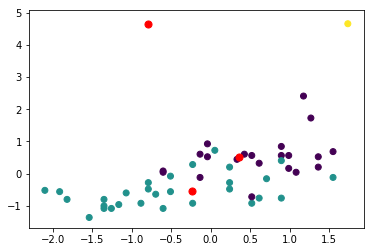

In [11]:
plt.scatter(crimes_num_z['Unemployment rate'], crimes_num_z['Murder and nonnegligent manslaughter rate'], c=crimes.kmeans)
plt.scatter(crimes_km.cluster_centers_[:, 0], crimes_km.cluster_centers_[:, 1], c='red', s=50)
plt.show()
#code borrowed from Professor Cannon.

In [12]:
crimes.groupby("kmeans").mean()

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
kmeans,,,,,,,,,,,
0,8779576.57,5.60,32.83,45.77,104.88,294.23,704.37,2099.33,243.91,5.68,21.13
1,4614726.03,2.96,26.05,35.62,62.21,170.95,399.09,1638.62,155.26,4.52,22.08
2,658893.00,15.90,53.40,71.60,530.70,626.10,526.00,4082.30,574.10,6.90,37.78


#### 7. Is that the right number of clusters?  How do you know?  Describe the quality of the clusters - be specific. 

For this question, we will examine two values to find the "right" number of clusters K; the within sum of squares and between sum of squares.

Objective with withinss: Must minimize.

In [13]:
withinss = crimes_km.inertia_
print(withinss)
#code borrowed from Professor Cannon.

298.95634925917017


Objective with betweenss: Must maximize.

In [14]:
def getBetweenss(data, kmeans_clusters):
    betweenss = 0
    mean = data.mean()
    for i in np.arange(len(data)):
        betweenss += np.sum((kmeans_clusters.cluster_centers_[kmeans_clusters.labels_[i]]-mean)**2)
    return betweenss
betweenss = getBetweenss(crimes_num_z, crimes_km)
print(betweenss)
#code borrowed from Professor Cannon.

262.04365074083


Silhouette analysis:

In [15]:
#adapted from sklearn documentation: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def silhouette_chart(sample_silhouette_values, n_clusters):
    y_lower = 10
   
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.26206849148021655


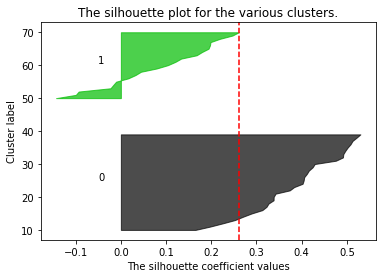

For n_clusters = 3 The average silhouette_score is : 0.2502459949407346


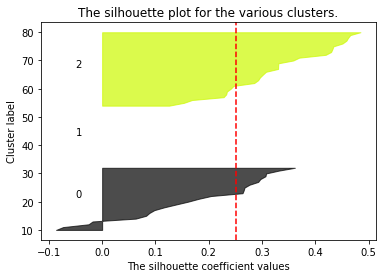

For n_clusters = 4 The average silhouette_score is : 0.21106411959965726


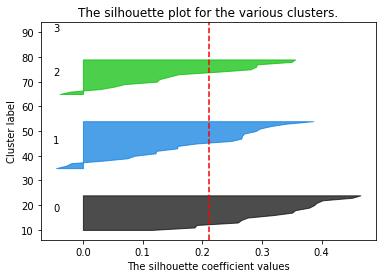

For n_clusters = 5 The average silhouette_score is : 0.21848109278494326


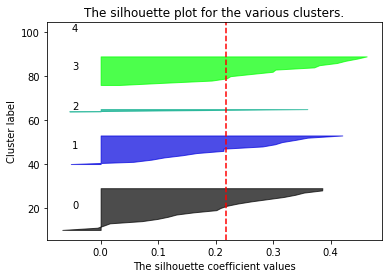

For n_clusters = 6 The average silhouette_score is : 0.22484966770069673


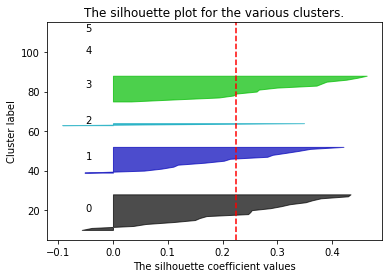

For n_clusters = 7 The average silhouette_score is : 0.20798047615809975


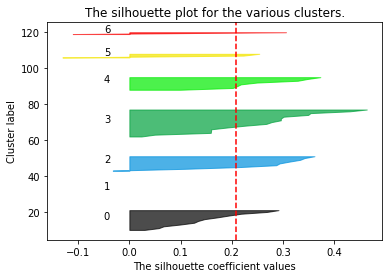

For n_clusters = 8 The average silhouette_score is : 0.17565311988450286


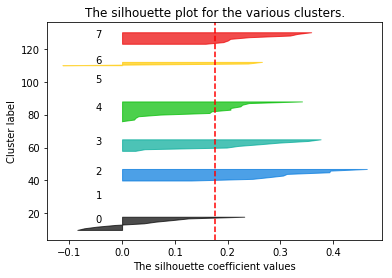

For n_clusters = 9 The average silhouette_score is : 0.16386403481240205


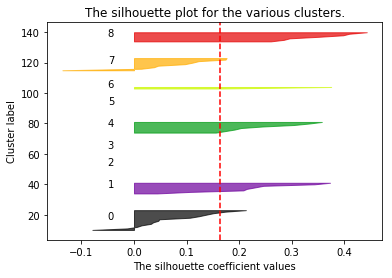

For n_clusters = 10 The average silhouette_score is : 0.17369783359976151


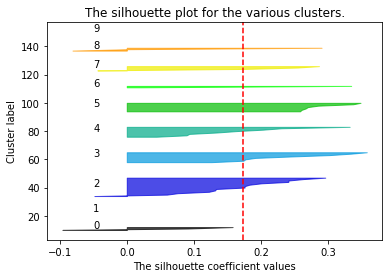

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(crimes_num_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(crimes_num_z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(crimes_num_z, cluster_labels)
    silhouette_chart(sample_silhouette_values, n_clusters)
    
#code borrowed from Professor Cannon.

The silhouette coefficient is highest when K = 2 at 0.26.

In [17]:
np.random.seed(123)

crimes_km2 = KMeans(n_clusters = 2).fit(crimes_num_z)
crimes_km3 = KMeans(n_clusters = 3).fit(crimes_num_z)
crimes_km4 = KMeans(n_clusters = 4).fit(crimes_num_z)
crimes_km5 = KMeans(n_clusters = 5).fit(crimes_num_z)
crimes_km6 = KMeans(n_clusters = 6).fit(crimes_num_z)
crimes_km7 = KMeans(n_clusters = 7).fit(crimes_num_z)

#code borrowed from Professor Cannon.

Cluster separation:

In [18]:
clusters2 = getBetweenss(crimes_num_z, crimes_km2)/(getBetweenss(crimes_num_z, crimes_km2) + crimes_km2.inertia_)
clusters3 = getBetweenss(crimes_num_z, crimes_km3)/(getBetweenss(crimes_num_z, crimes_km3) + crimes_km3.inertia_)
clusters4 = getBetweenss(crimes_num_z, crimes_km4)/(getBetweenss(crimes_num_z, crimes_km4) + crimes_km4.inertia_)
clusters5 = getBetweenss(crimes_num_z, crimes_km5)/(getBetweenss(crimes_num_z, crimes_km5) + crimes_km5.inertia_)
clusters6 = getBetweenss(crimes_num_z, crimes_km6)/(getBetweenss(crimes_num_z, crimes_km6) + crimes_km6.inertia_)
clusters7 = getBetweenss(crimes_num_z, crimes_km7)/(getBetweenss(crimes_num_z, crimes_km7) + crimes_km7.inertia_)

betweenss_metric = [clusters2, clusters3, clusters4, clusters5, clusters6, clusters7]
print(betweenss_metric)

#code borrowed from Professor Cannon.

[0.26046434016383785, 0.46710098171270925, 0.5517624945344107, 0.6220724153003406, 0.67283744615588, 0.7033582059228983]


Cluster separation is highest at K=7, at least in this sample. It seems to keep increasing as K increases.

Cluster cohesion:

In [19]:
clusters2 = crimes_km2.inertia_/(getBetweenss(crimes_num_z, crimes_km2) + crimes_km2.inertia_)
clusters3 = crimes_km3.inertia_/(getBetweenss(crimes_num_z, crimes_km3) + crimes_km3.inertia_)
clusters4 = crimes_km4.inertia_/(getBetweenss(crimes_num_z, crimes_km4) + crimes_km4.inertia_)
clusters5 = crimes_km5.inertia_/(getBetweenss(crimes_num_z, crimes_km5) + crimes_km5.inertia_)
clusters6 = crimes_km6.inertia_/(getBetweenss(crimes_num_z, crimes_km6) + crimes_km6.inertia_)
clusters7 = crimes_km7.inertia_/(getBetweenss(crimes_num_z, crimes_km7) + crimes_km7.inertia_)

totwithinss_metric = [clusters2, clusters3, clusters4, clusters5, clusters6, clusters7]
print(totwithinss_metric) #Looking for a ratio that is closer to 0. 

#code borrowed from Professor Cannon.

[0.7395356598361621, 0.5328990182872906, 0.4482375054655894, 0.3779275846996594, 0.32716255384412, 0.2966417940771016]


Cluster cohesion is highest at K=2. 

Based on the silhouette analysis and the betweenss & withinss ratios, K=2 is the "right" number of clusters since silhouette coefficient indicates how far away the sample is from neighboring clusters, which is highest at K=2, and cluster cohesion is also highest at K=2. However, cluster separation ratio seems to suggest that a higher number of clusters can result in more distance between clusters.

#### 8. Describe the characteristics of each cluster.  What do they have in common?  What is different about them?

Most data points in the clusters seem to be in assigned to the correct cluster, although the silhouette analysis suggests that there are some data points that are assigned to the wrong clusters. That might be why the cluster separation ratio seems to improve with increasing number of clusters, because if some data points are assigned to the wrong clusters, just separating them into smaller clusters may increase the distance between clusters. It's also evident that some clusters have much more data points than others as can be observed in the silhouette plot for when K=10.

#### 9. Investigate the members of each cluster.  Given the description of your clusters above, do any of the cluster assignments seem surprising?  Why or why not?

No, it is not surprising because we were already able to anticipate that states with higher unemployment rates also have higher crime rates overall as seen in the correlation table.

#### 10. Look for the same number of clusters using Kmediods. How do the clusters compare to Kmeans? Do any of the differences surprise you?

Since we concluded that K=2 is the "correct" number of clusters when using K mean, we'll set K as 2 for this analysis.

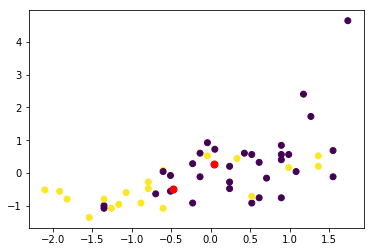

In [22]:
from sklearn_extra.cluster import KMedoids 

crimes_kmd2 = KMedoids(n_clusters = 2).fit(crimes_num_z)
crimes = crimes.assign(kmed=crimes_kmd2.labels_)
plt.scatter(crimes_num_z['Unemployment rate'], crimes_num_z['Murder and nonnegligent manslaughter rate'], c=crimes.kmed)
plt.scatter(crimes_kmd2.cluster_centers_[:, 0], crimes_kmd2.cluster_centers_[:, 1], c='red', s=50)
plt.show()
#code borrowed from Professor Cannon.

The results actually seem to be quite similar, althoug K medoids seem to yield more centrally located cluster center points since unlike the K mean, it doesn't take the mean value of the object in the cluster. This means that it is less affected by outliers than K mean, so the difference does not surprise me.

#### Extra credit (2 points) What is the mediod state for each of your clusters?  

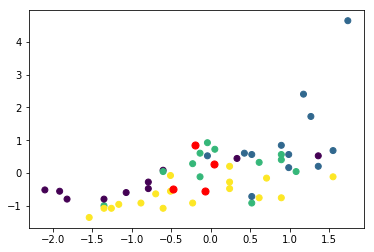

In [25]:
crimes_kmd2 = KMedoids(n_clusters = 4).fit(crimes_num_z)
crimes = crimes.assign(kmed=crimes_kmd2.labels_)
plt.scatter(crimes_num_z['Unemployment rate'], crimes_num_z['Murder and nonnegligent manslaughter rate'], c=crimes.kmed)
plt.scatter(crimes_kmd2.cluster_centers_[:, 0], crimes_kmd2.cluster_centers_[:, 1], c='red', s=50)
plt.show()

When we set K=4, we can see that the medoids are quite close to each other, indicating that the clusters are overlapping one another and similarly spread out.